In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [4]:
df = pd.read_csv("Sample - Superstore.csv")

# Display first 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
# Check all values

print(df.isna())

      Row ID  Order ID  Order Date  Ship Date  Ship Mode  Customer ID  \
0      False     False       False      False      False        False   
1      False     False       False      False      False        False   
2      False     False       False      False      False        False   
3      False     False       False      False      False        False   
4      False     False       False      False      False        False   
...      ...       ...         ...        ...        ...          ...   
9989   False     False       False      False      False        False   
9990   False     False       False      False      False        False   
9991   False     False       False      False      False        False   
9992   False     False       False      False      False        False   
9993   False     False       False      False      False        False   

      Customer Name  Segment  Country   City  ...  Postal Code  Region  \
0             False    False    False  False  ...

In [6]:
print(df.isna().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [9]:
# checking duplicate rows

df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

In [8]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (9994, 21) 

number of rows:  9994
number of columns:  21


In [11]:
# viewing the data types of columns
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [17]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Sales'] = df['Sales'].replace(r'[\$,]', '', regex=True)
df['Sales'] = pd.to_numeric(df['Sales'])

df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [18]:
# Statistical summary
df.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,NaN,1334,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,NaN,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,35,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,2016-04-30 00:07:12.259355648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
min,1.000000,NaN,2014-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,2015-05-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,2016-06-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,2017-05-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000
max,9994.000000,NaN,2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99301.000000,NaN,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,8399.976000


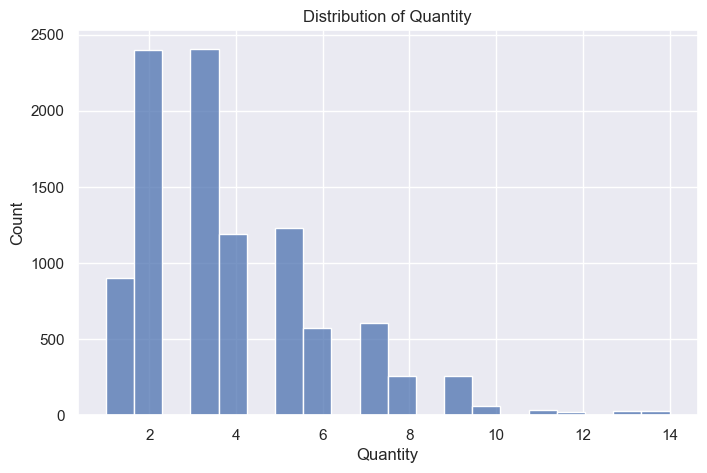

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['Quantity'], bins=20)
plt.title("Distribution of Quantity")
plt.show()

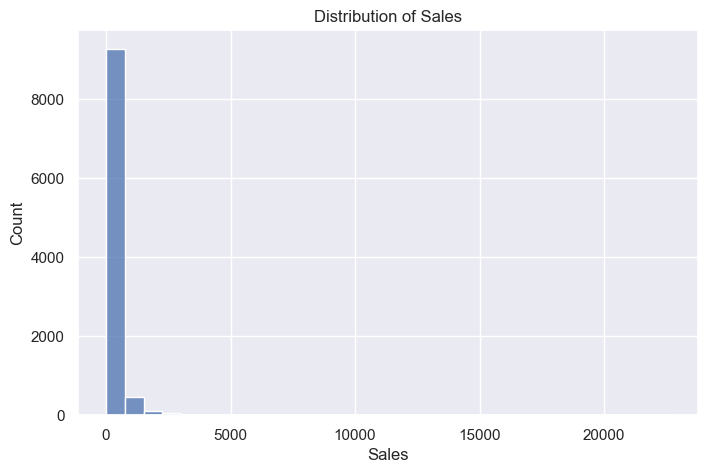

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=30)
plt.title("Distribution of Sales")
plt.show()

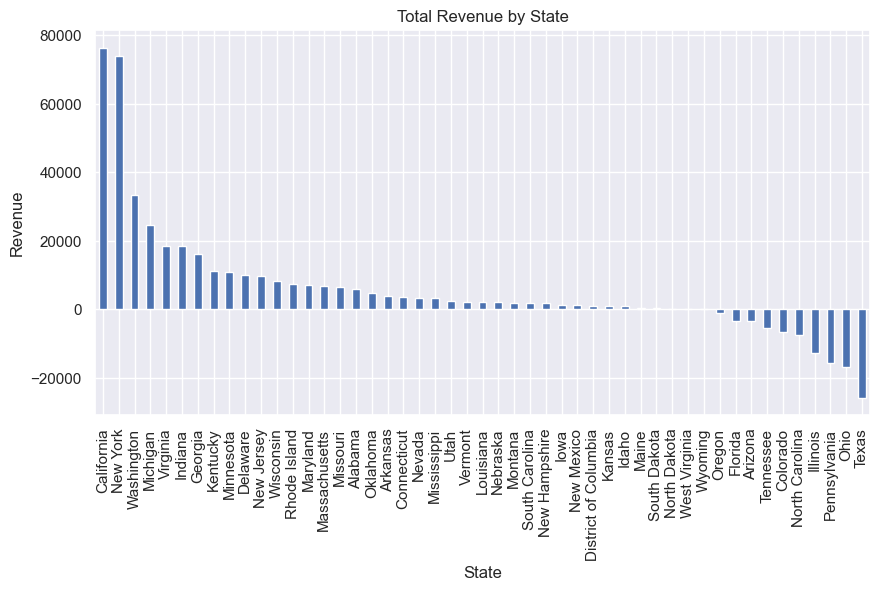

State
California              76381.3871
New York                74038.5486
Washington              33402.6517
Michigan                24463.1876
Virginia                18597.9504
Indiana                 18382.9363
Georgia                 16250.0433
Kentucky                11199.6966
Minnesota               10823.1874
Delaware                 9977.3748
New Jersey               9772.9138
Wisconsin                8401.8004
Rhode Island             7285.6293
Maryland                 7031.1788
Massachusetts            6785.5016
Missouri                 6436.2105
Alabama                  5786.8253
Oklahoma                 4853.9560
Arkansas                 4008.6871
Connecticut              3511.4918
Nevada                   3316.7659
Mississippi              3172.9762
Utah                     2546.5335
Vermont                  2244.9783
Louisiana                2196.1023
Nebraska                 2037.0942
Montana                  1833.3285
South Carolina           1769.0566
New Hampshire 

In [30]:
State_revenue = df.groupby('State')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
State_revenue.plot(kind='bar')
plt.title("Total Revenue by State")
plt.ylabel("Revenue")
plt.show()

State_revenue

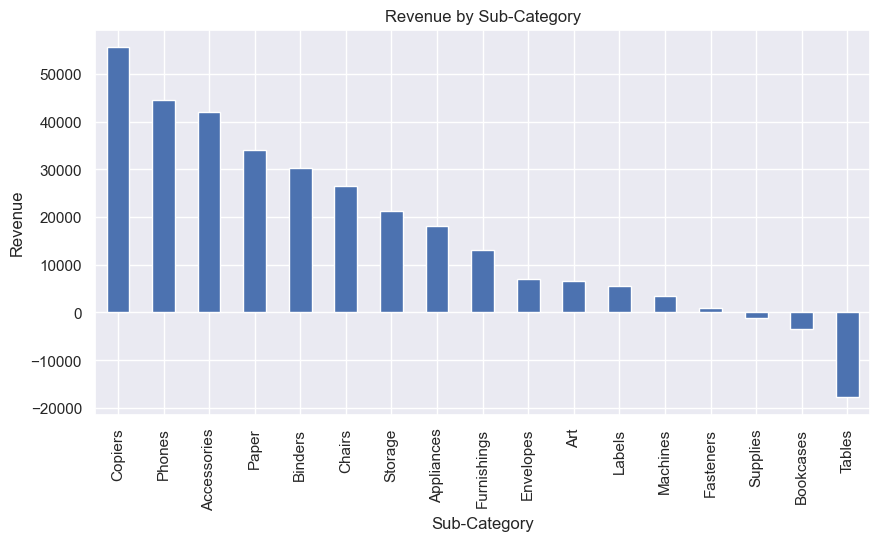

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Art             6527.7870
Labels          5546.2540
Machines        3384.7569
Fasteners        949.5182
Supplies       -1189.0995
Bookcases      -3472.5560
Tables        -17725.4811
Name: Profit, dtype: float64

In [32]:
Sub_Category_revenue = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
Sub_Category_revenue.plot(kind='bar')
plt.title("Revenue by Sub-Category")
plt.ylabel("Revenue")
plt.show()

Sub_Category_revenue

In [33]:
Customer_Name_revenue = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False)

Customer_Name_revenue.head(10)

Customer Name
Tamara Chand            8981.3239
Raymond Buch            6976.0959
Sanjit Chand            5757.4119
Hunter Lopez            5622.4292
Adrian Barton           5444.8055
Tom Ashbrook            4703.7883
Christopher Martinez    3899.8904
Keith Dawkins           3038.6254
Andy Reiter             2884.6208
Daniel Raglin           2869.0760
Name: Profit, dtype: float64

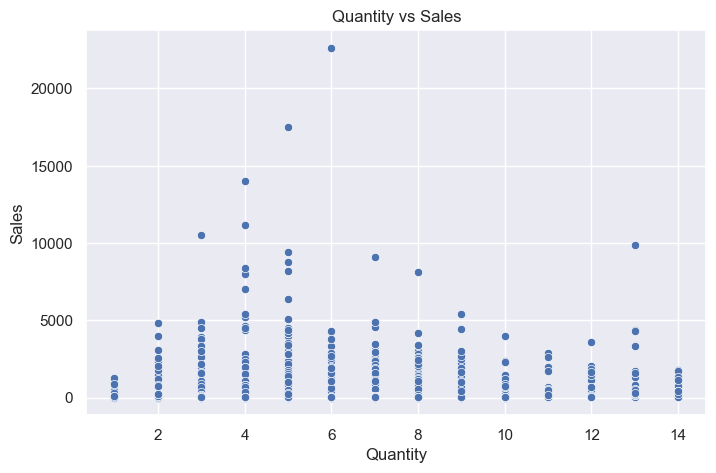

In [43]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Quantity', y='Sales', data=df)
plt.title("Quantity vs Sales")
plt.show()

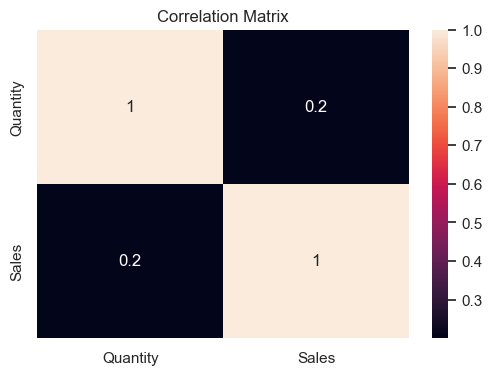

In [44]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Quantity', 'Sales']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

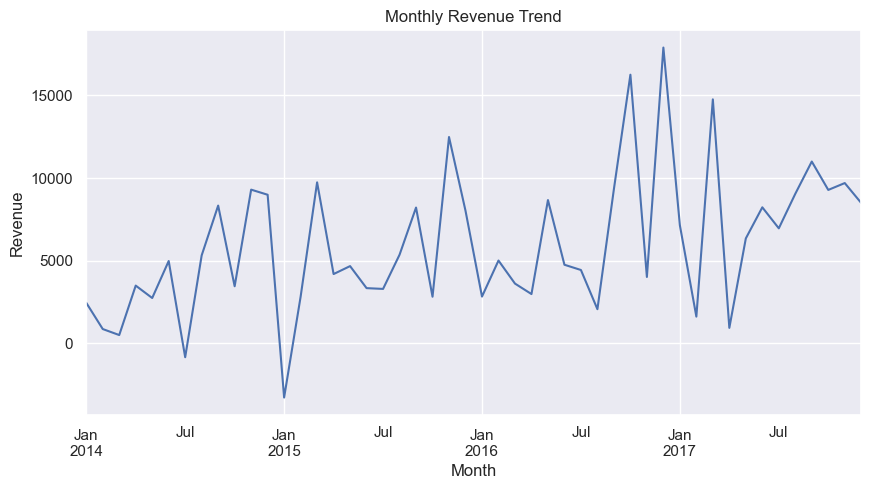

In [45]:
df['Month'] = df['Order Date'].dt.to_period('M')

monthly_revenue = df.groupby('Month')['Profit'].sum()

plt.figure(figsize=(10,5))
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()